# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def computeFTI(I):
    """ Array -> Array[complex] """
    return ifft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(np.abs(fftshift(If))+1)
def thresholdImage(I,s):
    return np.where((I<s),0,255)
    """ Array*int -> Array """
    
threshold=1e-10

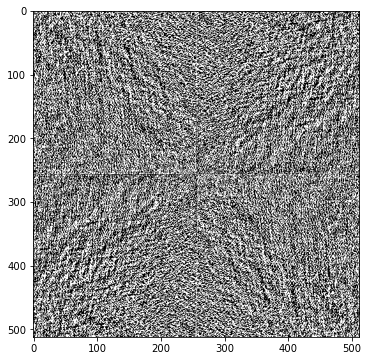

In [3]:
mandrill = np.array(Image.open('img/mandrill.png'))
ft_mandrill = computeFT(mandrill)
ft_mandrill = toVisualizeFT(ft_mandrill)
imshow(thresholdImage(ft_mandrill, threshold)) 

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [4]:
def idealLowPassFilter(n,m,fc):
    res=np.zeros([n,m])
    center=np.array((int(n/2),int(m/2)))
    for i in range(len(res)):
        for j in range(len(res[i])):
            vc=np.array((i+1,j+1))
            if(np.linalg.norm(center - vc)<fc):
                res[i][j]=1
    return res

In [5]:
def idealLowPassFilter2(n,m,fc):
    x=np.arange(n)-n/2
    y=np.arange(m)-m/2
    X,Y=np.meshgrid(y,x)
    return np.where(X**2+Y**2>(fc**2),0,1)

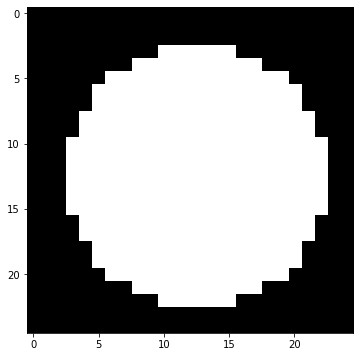

In [6]:
imshow(idealLowPassFilter2(25,25,10))

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [7]:
def lowPass(I,fc):
    n,m=I.shape
    res=computeFT(I)
    res_tv= np.fft.fftshift(res)
    resf=res_tv*idealLowPassFilter2(n,m,fc)
    resf2=np.fft.ifft2(resf)
    return np.abs(resf2)

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


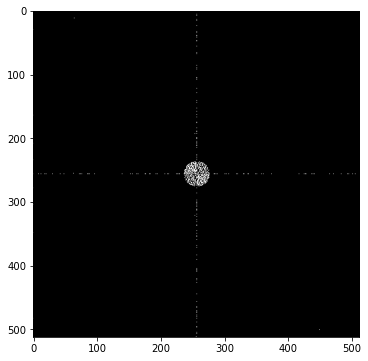

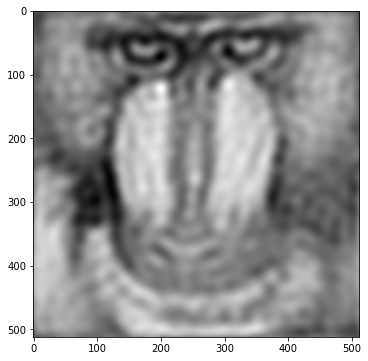

In [8]:
mandrill2=lowPass(mandrill,20)
res=computeFT(mandrill2)
res_tv= np.fft.fftshift(res)
imshow(thresholdImage(res_tv, threshold))
imshow(mandrill2)

In [9]:
#

#

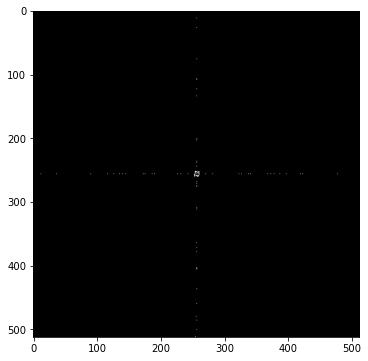

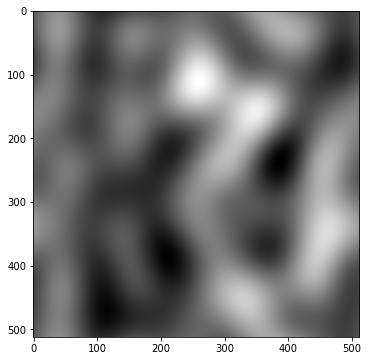

In [10]:
lena = np.array(Image.open('img/lena.jpg'))
lena2=lowPass(lena,5)
res=computeFT(lena2)
res_tv= np.fft.fftshift(res)
imshow(thresholdImage(res_tv, threshold))
imshow(lena2)

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

49


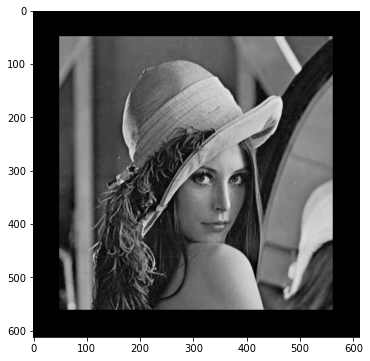

In [11]:
def Imagepad(I,h):
    f=h.shape[0]
    m,c= I.shape
    res=np.zeros((m+f,c+f))
    b=int(f/2)-1
    print(b)
    for i in range(m+f-1):
        for j in range(c+f-1):
            if i<b or i>m+b-1 or j>c+b-1 or j<b:
                res[i][j]=0
            else:
                res[i][j]=I[i-b][j-b]
    return res

g=np.zeros((100,100))
lenaa=Imagepad(lena,g) 
imshow(lenaa)

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [12]:
def conv2(I,h):
    Impad=Imagepad(I,h)
    output = np.zeros_like(Impad)
    for x in range(I.shape[1]):
        for y in range(I.shape[0]):
            
            output[y, x] = (h * Impad[y: y+h.shape[0], x: x+h.shape[0]]).sum()

    return output

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

4


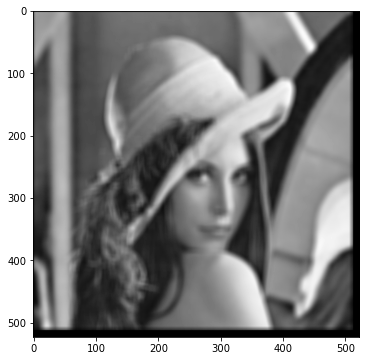

In [13]:
h=np.ones((11,11))
lenaa=conv2(lena,h)
imshow(lenaa)

In [14]:
# 

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

499


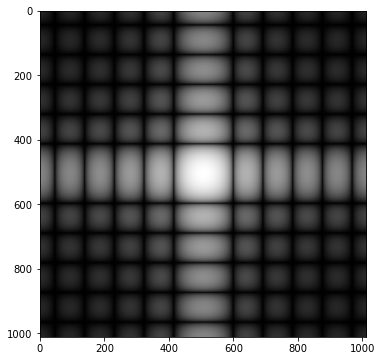

In [15]:
h2=Imagepad(h,np.zeros((1000,1000)))
lena_ft=computeFT(h2)
lena_ft_log=toVisualizeLogFT(lena_ft)
imshow(lena_ft_log)

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

# 

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [16]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

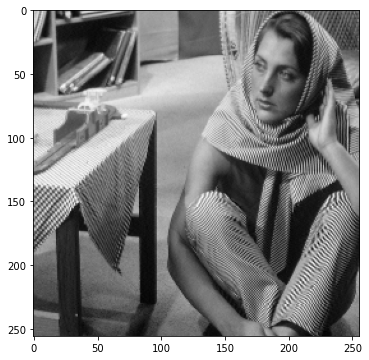

In [17]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

Barbara = np.array(Image.open('img/barbara.png'))

Barbara2=subSample2(Barbara)
imshow(Barbara2)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

In [18]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    print(A.shape)
    return A

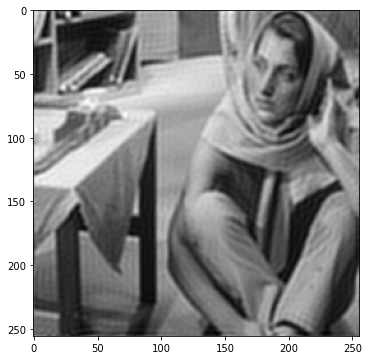

(10, 10)
4


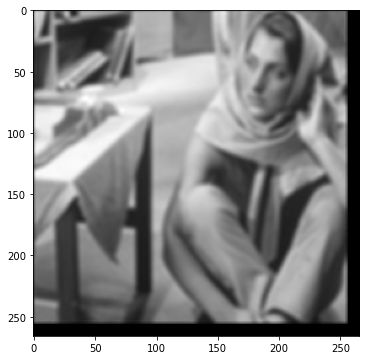

In [19]:
Barbarlp2=lowPass(Barbara,50)
Barbara2lp=subSample2(Barbarlp2)
c,v=Barbara2lp.shape
imshow(Barbara2lp)
Barbara2lpf=conv2(Barbara2lp,antiAliasingFilter(10,10))
imshow(Barbara2lpf)

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

In [20]:
# 

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

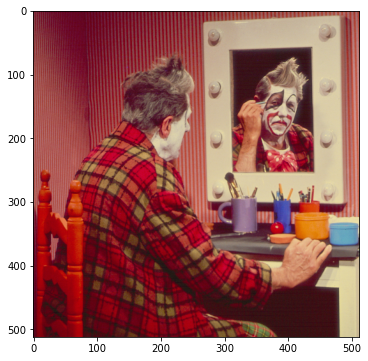

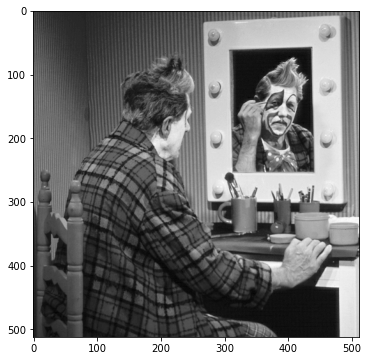

(512, 512, 3)
(512, 512)


In [21]:
clown = np.array(Image.open('img/clown.bmp'))
clown_lumi = np.array(Image.open('img/clown_lumi.bmp'))
imshow(clown)
imshow(clown_lumi)
print(clown.shape)
print(clown_lumi.shape)

In [22]:
# Il y a une image 3 fois plus grande car il y a les 3 canaux de couleur.

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

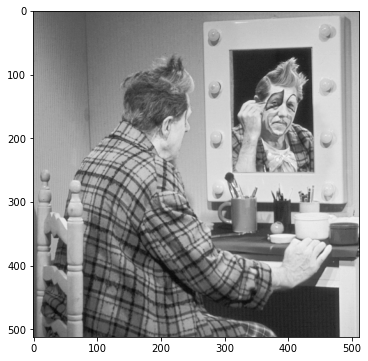

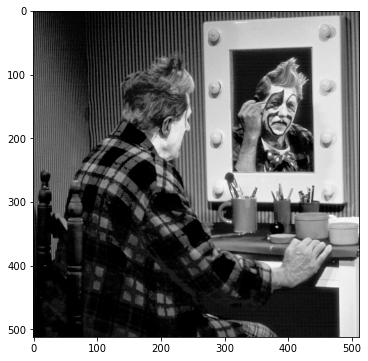

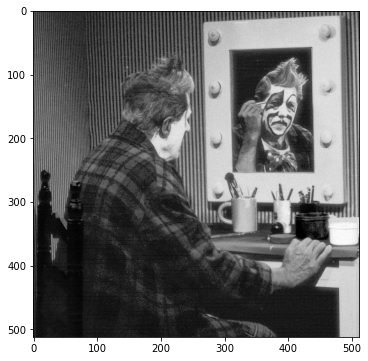

In [23]:
# Chaque dimension correspond a un canal R, G ou B.
clown_R = clown[:,:,0]
imshow(clown_R)
clown_G = clown[:,:,1]
imshow(clown_G)
clown_B = clown[:,:,2]
imshow(clown_B)

In [24]:
# On voit les 3 canaux de l'image en grayscale, rouge, vert puis bleu.

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

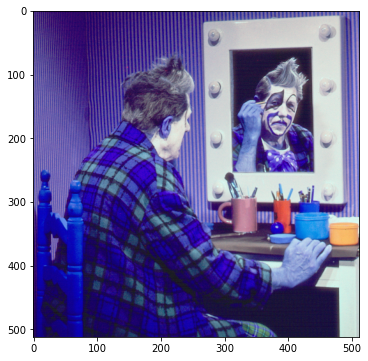

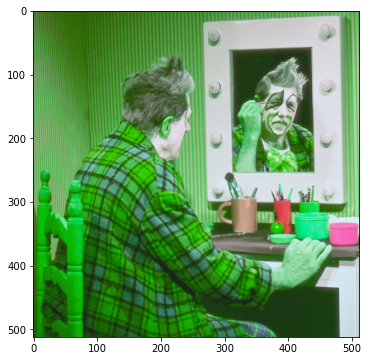

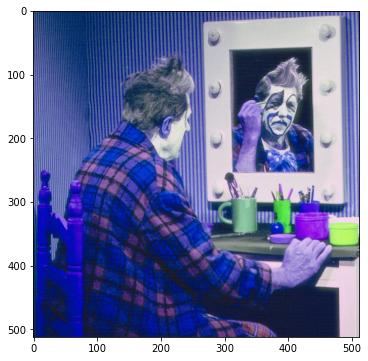

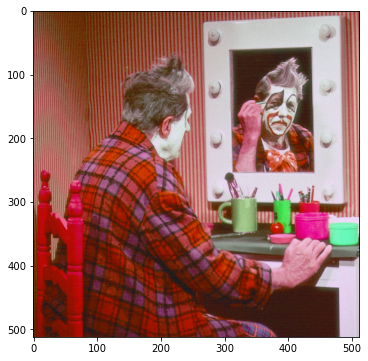

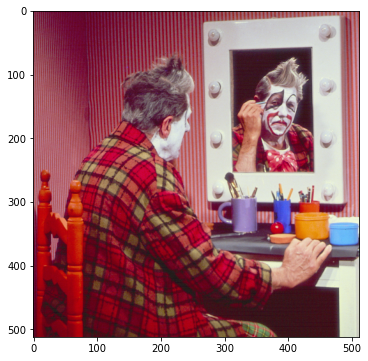

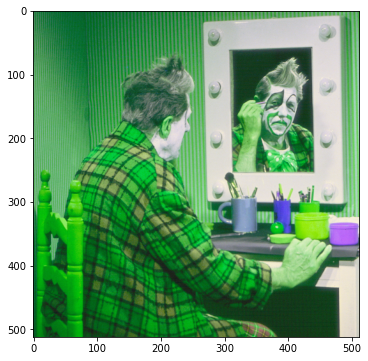

In [25]:
clown_3 = np.zeros((clown.shape))
clown_3[:,:,0] = clown_B/clown_B.max()
clown_3[:,:,1] = clown_G/clown_G.max()
clown_3[:,:,2] = clown_R/clown_R.max()
imshow(clown_3)

clown_3 = np.zeros((clown.shape))
clown_3[:,:,0] = clown_B/clown_B.max()
clown_3[:,:,2] = clown_G/clown_G.max()
clown_3[:,:,1] = clown_R/clown_R.max()
imshow(clown_3)

clown_3 = np.zeros((clown.shape))
clown_3[:,:,1] = clown_B/clown_B.max()
clown_3[:,:,0] = clown_G/clown_G.max()
clown_3[:,:,2] = clown_R/clown_R.max()
imshow(clown_3)

clown_3 = np.zeros((clown.shape))
clown_3[:,:,1] = clown_B/clown_B.max()
clown_3[:,:,2] = clown_G/clown_G.max()
clown_3[:,:,0] = clown_R/clown_R.max()
imshow(clown_3)

clown_3 = np.zeros((clown.shape))
clown_3[:,:,2] = clown_B/clown_B.max()
clown_3[:,:,1] = clown_G/clown_G.max()
clown_3[:,:,0] = clown_R/clown_R.max()
imshow(clown_3)

clown_3 = np.zeros((clown.shape))
clown_3[:,:,2] = clown_B/clown_B.max()
clown_3[:,:,0] = clown_G/clown_G.max()
clown_3[:,:,1] = clown_R/clown_R.max()
imshow(clown_3)

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

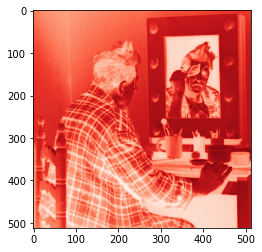

In [26]:
# Chaque dimension correspond a un canal R, G ou B.
clown_R = clown[:,:,0]
plt.imshow(clown_R, cmap="Reds")

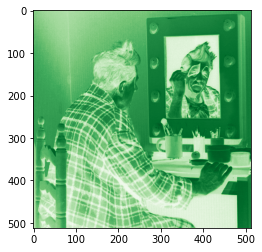

In [27]:
clown_G = clown[:,:,1]
plt.imshow(clown_R, cmap="Greens")

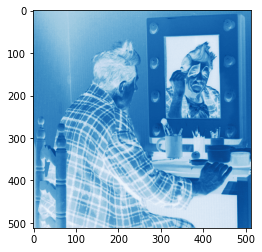

In [28]:
clown_B = clown[:,:,2]
plt.imshow(clown_R, cmap="Blues")